# Loan predictor dataset

>Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

 <b>OBJECTIVE :- </b> TO CLASSIFY WHETHER CUSTOMER WILL REPAY LOAN OR NOT

Importing the required libraries

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from fastai.imports import *

from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
#Reading the dataset in a dataframe using Pandas
loan_train=pd.read_csv("train_loan.csv")
loan_train_raw=loan_train.copy()


In [5]:
#Reading the dataset in a dataframe using Pandas
loan_test=pd.read_csv("test_loan.csv")
loan_test_raw=loan_test.copy()


In [6]:
loan=[loan_train_raw , loan_test_raw ]

In [7]:
loan_train_raw.shape

(614, 13)

In [144]:
loan_train_raw.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
loan_train_raw["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
loan_train_raw["Gender"].value_counts().sum()


601

In [147]:
apply_cats

<function fastai.structured.apply_cats(df, trn)>

In [10]:
train_cats(loan_train_raw)

In [149]:
loan_train_raw.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [150]:
loan_train_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

>LoanAmount has (614 – 592) 22 missing values.
>Loan_Amount_Term has (614 – 600) 14 missing values.
>Credit_History has (614 – 564) 50 missing values.
>We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, >Credit_History has value 1 for those who have a credit history and 0 otherwise)
>The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

## Distribution analysis

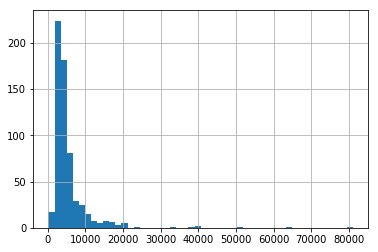

In [11]:
loan_train_raw['ApplicantIncome'].hist(bins=50)

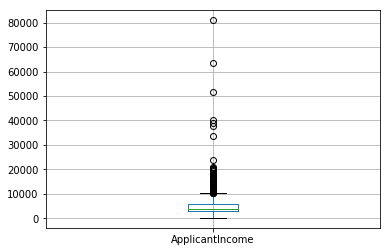

In [13]:
loan_train_raw.boxplot(column='ApplicantIncome')

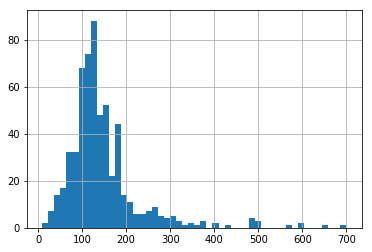

In [14]:
loan_train_raw['LoanAmount'].hist(bins=50)

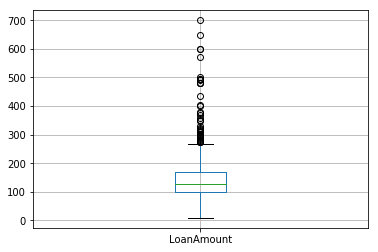

In [15]:
loan_train_raw.boxplot(column='LoanAmount')

Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding

Text(0.5, 1.0, 'Probability of getting loan by credit history')

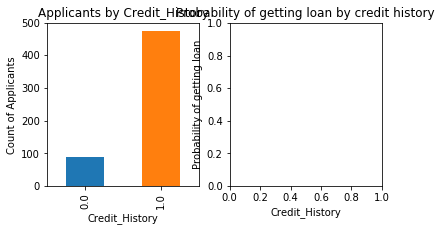

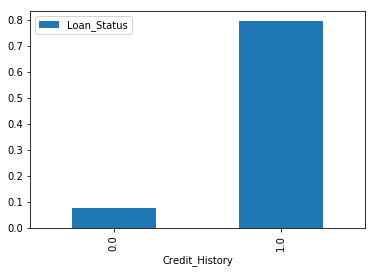

In [22]:
temp1 = loan_train_raw['Credit_History'].value_counts(ascending=True)
temp2 = loan_train_raw.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

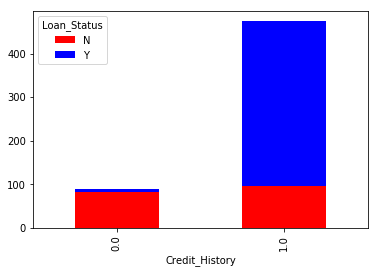

In [24]:
temp3 = pd.crosstab( loan_train_raw['Credit_History'],  loan_train_raw['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [26]:
temp1 = loan_train_raw['Credit_History'].value_counts(ascending=True)
temp2 = loan_train_raw.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Now converting the strings, categorical and null values to integer using proc_df function which is a part of fastai library

In [151]:
df, y, nas = proc_df(loan_train_raw, 'Loan_Status')

In [152]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,1.775244,1.643322,1.719870,1.218241,1.081433,5403.459283,1621.245798,145.752443,342.410423,0.855049,2.037459
std,177.390811,0.465767,0.489511,1.039056,0.413389,0.423472,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,154.250000,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000
50%,307.500000,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,2.000000
75%,460.750000,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000
max,614.000000,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


In [199]:
m = RandomForestClassifier( n_estimators=80, min_samples_leaf=1, 
                      max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(df, y)
m.score(df,y)

1.0

In [156]:
loan_test_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [163]:
loan_test_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [168]:
train_cats(loan_test_raw)

In [158]:
loan_train_raw.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [169]:
df_test, y_test, nas = proc_df(loan_test_raw,None)

In [170]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na
0,1,2,2,1,1,1,5720,0,110.0,360.0,1.0,3,False,False,False
1,2,2,2,2,1,1,3076,1500,126.0,360.0,1.0,3,False,False,False
2,3,2,2,3,1,1,5000,1800,208.0,360.0,1.0,3,False,False,False
3,4,2,2,3,1,1,2340,2546,100.0,360.0,1.0,3,False,False,True
4,5,2,1,1,2,1,3276,0,78.0,360.0,1.0,3,False,False,False


In [171]:
df_test.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,184.000000,1.749319,1.634877,1.779292,1.228883,1.038147,4805.599455,1569.577657,135.980926,342.822888,0.839237,2.079019
std,106.088014,0.498460,0.482122,1.097840,0.420687,0.403082,4910.685399,2334.232099,60.959739,64.658402,0.367814,0.824337
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,1.000000
25%,92.500000,2.000000,1.000000,1.000000,1.000000,1.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000
50%,184.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,2.000000
75%,275.500000,2.000000,2.000000,3.000000,1.000000,1.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,3.000000
max,367.000000,2.000000,2.000000,4.000000,2.000000,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,3.000000


In [200]:
Y_pred=m.predict(df_test)

In [194]:
submission = pd.DataFrame({
    "Loan_ID": df_test["Loan_ID"],
    "Loan_Status": Y_pred
})
submission.to_csv('loan_submission.csv', index = False)

In [201]:
Y_pred


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 

In [186]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 